# Introduction

Welcome to my music recommender \emoji{musical_note}! 

The goal of this project is to build a music recommender system using Spotify's music data (songs from 1920-2020). The recommender system will take in a song and return a list of songs that are similar to the input song. The similarity between songs is determined by the song features provided by Spotify. A full documentation on song features can be found [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features).


The notebook started with EDA on the decade, artist, genre, popularity data, followed by data standardization and recommender system building. In the end I reused the recommender system to build a web app using streamlit. The web app can be found [here](https://yannansoda-spotify-music-recommender-app-16d88c.streamlit.app/).

Key methods:

EDA, dimensionality reduction, kMeans, wordcould, data standardization, cosine similarity, recommender system, web app

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

from wordcloud import WordCloud
from PIL import Image

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Load and check the dataset

In [2]:
# dat = pd.read_csv('../data/raw/data.csv')
# dat_artist = pd.read_csv('../data/raw/data_by_artist.csv')
# dat_genres = pd.read_csv('../data/raw/data_by_genres.csv')
# dat_year = pd.read_csv('../data/raw/data_by_year.csv')

dat = pd.read_csv('C:\Project\Innomatics\ML\ML phase2\data\data.csv')
dat_artist = pd.read_csv('C:\Project\Innomatics\ML\ML phase2\data\data_by_artist.csv')
dat_genres = pd.read_csv('C:\Project\Innomatics\ML\ML phase2\data\data_by_genres.csv')
dat_year = pd.read_csv('C:\Project\Innomatics\ML\ML phase2\data\data_by_year.csv')

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
dat.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
dat_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
dat_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [7]:
dat_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


We can see that in `data.scv` there are two types of features: one with basic information about the song (id, name, artist, year, release_date, duration_ms) and the other with the audio features of the song. Some audio features are absolute values such as `loudness` (although it has negative values?) and `tempo`, as well as `popularity`, while others are values in $[0, 1]$ such as `valence` and `acousticness`.

We can already separate the features into several groups:

In [8]:
song_info_features = ['name', 'artists', 'id', 'release_date', 'year', 'popularity']
song_features_normalized = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
song_features_not_normalized = ['duration_ms', 'key', 'loudness', 'mode', 'tempo']

Note that there is no `genre` column in the main dataset. Also there is no `explicit` in `dat_year`.


The other three datasets are averages by artist, genre and year. We can verify this by comparing the mean of the main dataset and the values of the other datasets:

In [9]:
dat_mean_year = dat_year.groupby('year').mean().reset_index()

print("The number of inconsistent values in the dataset is: ")
np.sum(dat_mean_year[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values != dat_year.groupby('year').mean()[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values)

The number of inconsistent values in the dataset is: 


0

Music are often analyzed in terms of decades, so we will add a `decade` column to the main dataset. 

In [10]:
# add a column of dacade to the dataset 
dat['decade'] = ((dat['year'] - 1)//10)*10
dat_year['decade'] = ((dat_year['year'] - 1)//10)*10


# EDA

## EDA - decade

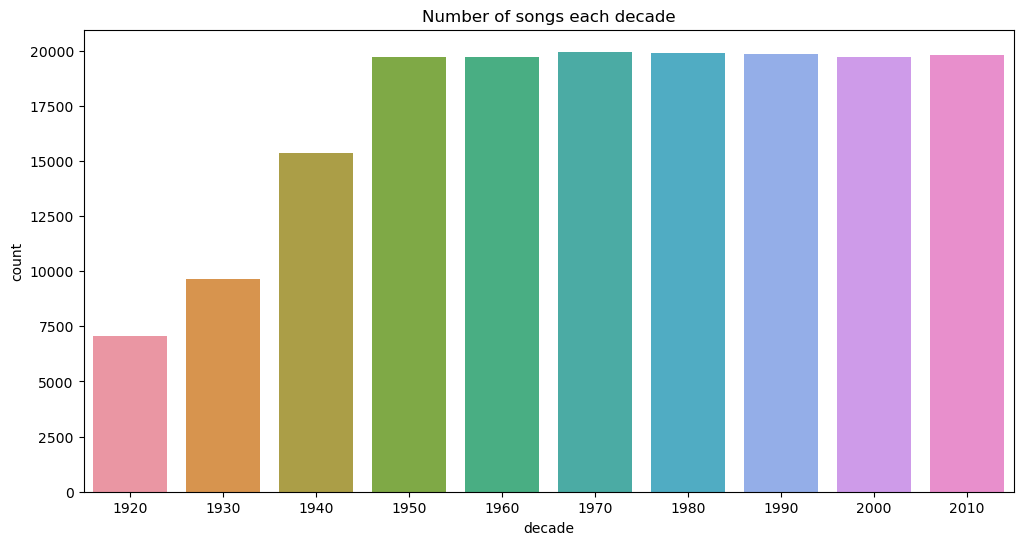

In [11]:
# plot the total number of songs each decade
plt.figure(figsize=(12,6))
sns.countplot(x='decade', data=dat)
plt.title('Number of songs each decade')
plt.show()


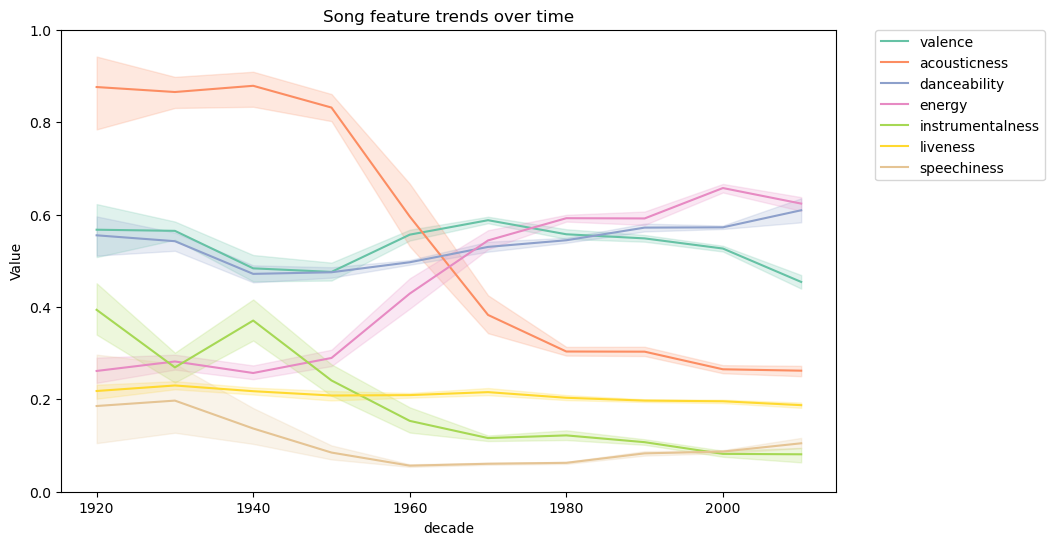

In [12]:
# how the song features change over time
plt.figure(figsize=(10, 6))
for feature in song_features_normalized:
    sns.lineplot(x='decade', y=feature, data=dat_year, label=feature)
plt.ylabel('Value')
plt.ylim(0, 1)
plt.title('Song feature trends over time')
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

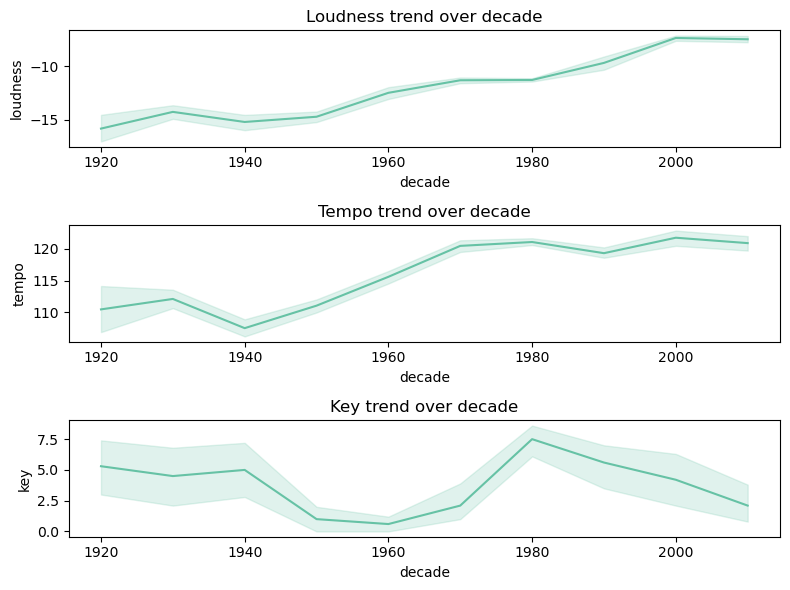

In [13]:
# plot the trends of loudness, tempo, key by year in subplots 
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
sns.lineplot(x='decade', y='loudness', data=dat_year, ax=axes[0])
sns.lineplot(x='decade', y='tempo', data=dat_year, ax=axes[1])
sns.lineplot(x='decade', y='key', data=dat_year, ax=axes[2])
axes[0].set_title('Loudness trend over decade')
axes[1].set_title('Tempo trend over decade')
axes[2].set_title('Key trend over decade')
plt.tight_layout()
plt.show()


## EDA - artist

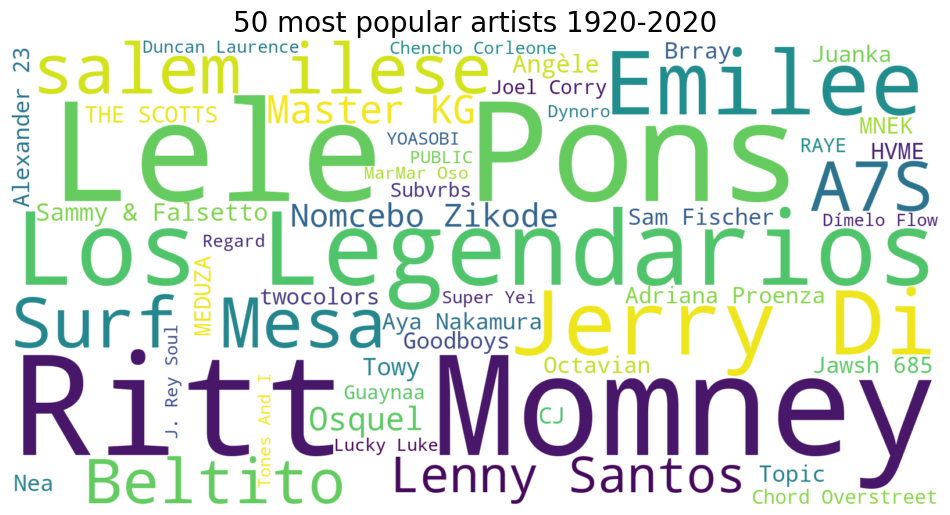

In [14]:
# plot a word cloud of the most popular artists over time
# create a dictionary of artist and their popularity
artist_popularity = dat_artist[['artists', 'popularity']].set_index('artists').to_dict()['popularity']
# sort the dictionary by value
artist_popularity = sorted(artist_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(artist_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular artists 1920-2020', fontsize=20)
plt.show()

In [15]:
# we can also check the most popular artists in each decade
# create a dictionary of artist and their popularity
artist_popularity_decade = dat.groupby(['decade', 'artists'])['popularity'].mean().reset_index()
artist_popularity_decade = artist_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
artist_popularity_decade = artist_popularity_decade.groupby('decade').head(1)
artist_popularity_decade


,decade,artists,popularity
33530,2010,"['Bad Bunny', 'Jhay Cortez']",100.0
31225,2000,"['Shakira', 'Wyclef Jean']",83.0
21963,1990,"['Frank Sinatra', 'B. Swanson Quartet']",80.0
17449,1980,"['Grover Washington, Jr.', 'Bill Withers']",79.0
13396,1970,"['Blue Swede', 'Björn Skifs']",75.0
11228,1960,"['Frank Sinatra', 'Nancy Sinatra']",71.0
7650,1950,['Gayla Peevey'],61.0
3154,1940,"['Bing Crosby', 'The Andrews Sisters']",59.2
2300,1930,"['Richard Himber and his Orchestra', 'Johnny M...",35.0
93,1920,"['Benny Goodman', 'Peggy Lee']",38.0


## EDA - genre

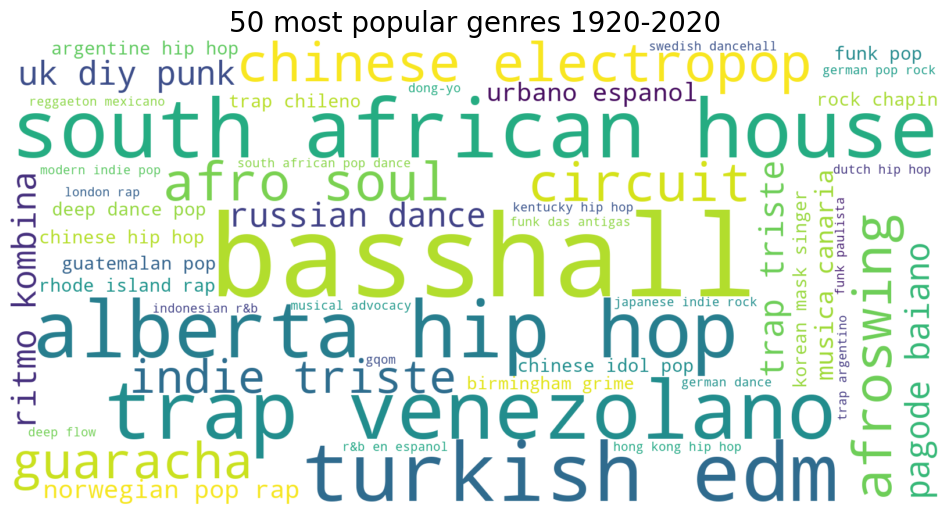

In [16]:
# plot a word cloud of the most popular genres over time
# create a dictionary of genre and their popularity
genre_popularity = dat_genres[['genres', 'popularity']].set_index('genres').to_dict()['popularity']
# sort the dictionary by value
genre_popularity = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(genre_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular genres 1920-2020', fontsize=20)
plt.show()

In the following we will analyze the features of the genres in the dataset.

In [18]:
# define song features
# features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
song_featues = song_features_normalized + song_features_not_normalized
# standardize the features
scaler = StandardScaler()
feature_for_cluster = scaler.fit_transform(dat_genres[song_featues])

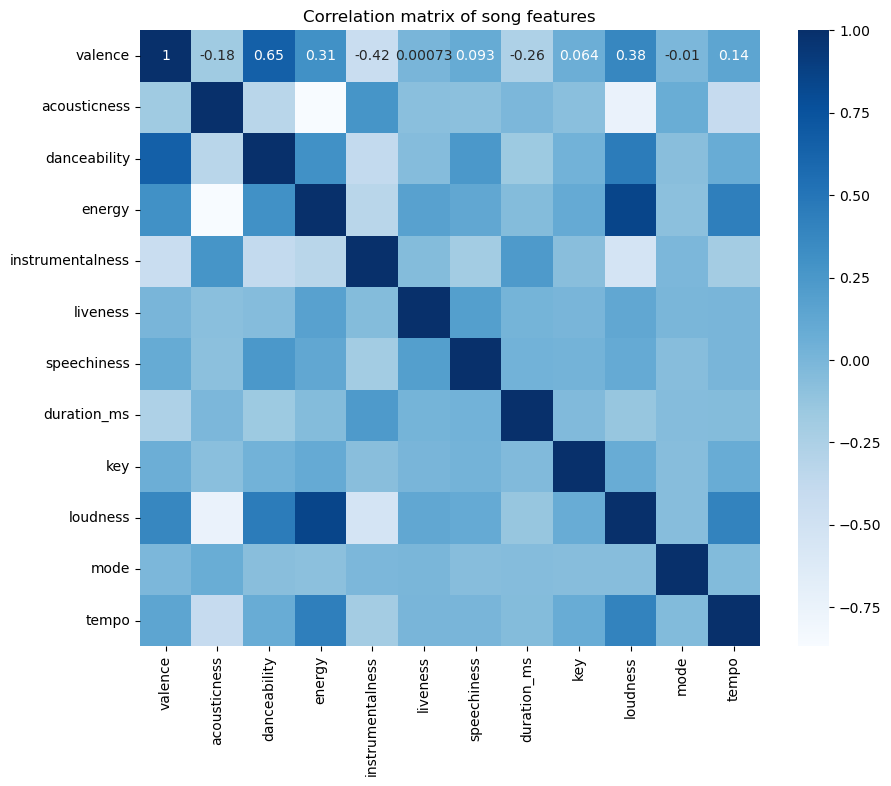

In [19]:
# make a correlation matrix of the song features
corr = np.corrcoef(feature_for_cluster.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, 
            xticklabels=song_featues, yticklabels=song_featues, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

We can find there are stong correlations between some features. We can try dimension reduction methods to reduce the dimension of the dataset.

In [20]:
# apply dimensionality reduction to the standardized song features

# one way is to use PCA
# pca = PCA(n_components=2)
# feature_for_cluster_dim_redu = pca.fit_transform(feature_for_cluster)

# another way is to use t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
feature_for_cluster_dim_redu = tsne.fit_transform(feature_for_cluster)

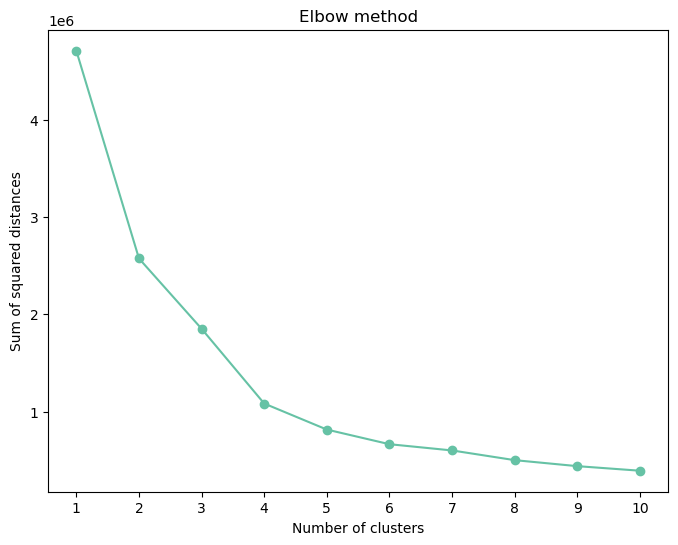

In [21]:
# use the elbow method to find the optimal number of clusters
# calculate the sum of squared distances for different number of cluster
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_for_cluster_dim_redu)
    ssd.append(kmeans.inertia_)
# plot the sum of squared distances for different number of cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

The elbow method shows that the optimal number of clusters is around 4.

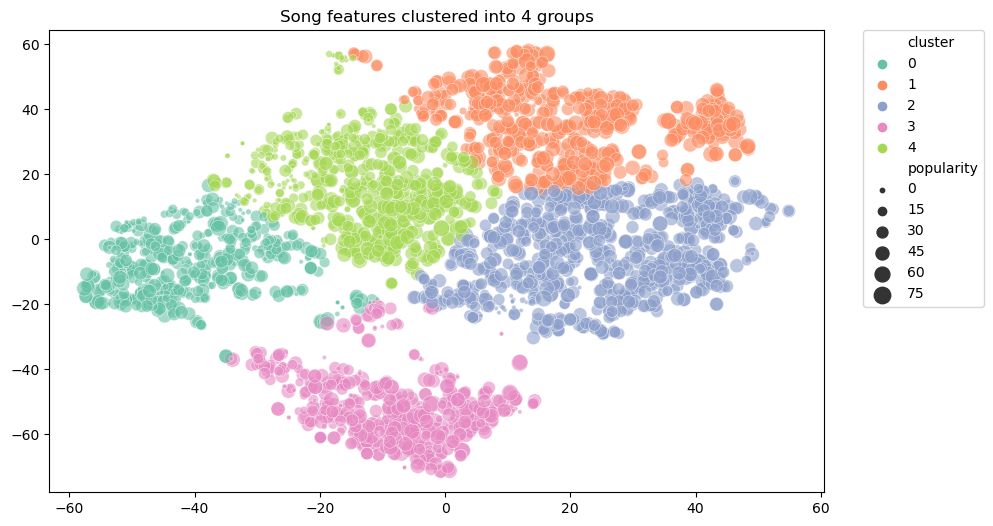

In [22]:
# cluster the features into 5 clusters using KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(feature_for_cluster_dim_redu)
# add the cluster labels to the dataset
dat_genres['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_for_cluster_dim_redu[:, 0], y=feature_for_cluster_dim_redu[:, 1], 
                hue=dat_genres['cluster'], palette='Set2', size=dat_genres['popularity'], sizes=(10, 150), alpha=0.6)
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Song features clustered into 4 groups')
plt.show()


In [23]:
# with the clusters, we find the top 5 popular genres in each cluster
popular_genres = dat_genres.groupby('cluster')['genres', 'popularity'].apply(lambda x: x.nlargest(5, columns=['popularity'])).reset_index()

for i in range(5):
    print(f"Cluster {i} : {popular_genres.query('cluster == @i')['genres'].tolist()}")

Cluster 0 : ['irish indie', 'lo-fi house', 'shush', 'white noise', 'lo-fi chill']
Cluster 1 : ['basshall', 'south african house', 'trap venezolano', 'trap triste', 'urbano espanol']
Cluster 2 : ['circuit', 'guaracha', 'russian dance', 'trap chileno', 'japanese indie rock']
Cluster 3 : ['turkish edm', 'alberta hip hop', 'chinese electropop', 'afroswing', 'afro soul']
Cluster 4 : ['indie triste', 'guatemalan pop', 'rock chapin', 'chinese hip hop', 'modern indie pop']


C:\Users\Sri\AppData\Local\Temp\ipykernel_22928\1019855555.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  popular_genres = dat_genres.groupby('cluster')['genres', 'popularity'].apply(lambda x: x.nlargest(5, columns=['popularity'])).reset_index()


In [45]:
pip install numpy==1.21.1

Note: you may need to restart the kernel to use updated packages.Collecting numpy==1.21.1
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.0/10.3 MB 435.7 kB/s eta 0:00:24
     --------------------------------------- 0.1/10.3 MB 751.6 kB/s eta 0:00:14
     - -------------------------------------- 0.3/10.3 MB 2.0 MB/s eta 0:00:06
     - -------------------------------------- 0.4/10.3 MB 2.2 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/10.3 MB 3.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/10.3 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/10.3 MB 4.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/10.3 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.8/10.3 MB 4.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/10.

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [206 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.1 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\Sri\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Sri\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\Sri\\

In [49]:
# find the most central genre in each cluster

# calculate the distance between each genre and the cluster center
genre_cluster_center = []
for i in range(5):
    genre_cluster_center.append(dat_genres.query('cluster == @i')[song_featues].mean().values)
genre_cluster_center = np.array(genre_cluster_center)

# calculate the distance between each genre and the cluster center
genre_cluster_center_dist = []
for i in range(5):
    genre_cluster_center_dist.append(np.linalg.norm(dat_genres.query('cluster == @i')[song_featues].values - genre_cluster_center[i], axis=1))
genre_cluster_center_dist = np.array(genre_cluster_center_dist,dtype = object)

# find the 5 most central genre in each cluster
central_genres = []
for i in range(5):
    central_genres.append(dat_genres.query('cluster == @i')['genres'].iloc[np.argsort(genre_cluster_center_dist[i])[:5]].tolist())

for i in range(5):
    print(f"Cluster {i} : {central_genres[i]}")
    

Cluster 0 : ['hungarian classical performance', 'german jazz', 'wisconsin indie', 'barockinterpreten', 'opera']
Cluster 1 : ['baton rouge rap', 'pop peruano', 'k-rap', 'argentine reggae', 'musica alagoana']
Cluster 2 : ['british blues', 'liquid funk', 'oxford indie', 'j-pop', 'vancouver punk']
Cluster 3 : ['deep uplifting trance', 'finnish alternative rock', 'austropop', 'aussietronica', 'deep g funk']
Cluster 4 : ['tollywood', 'classic uk pop', 'chinese jazz', 'classic schlager', 'pop quebecois']


## EDA - popularity of songs

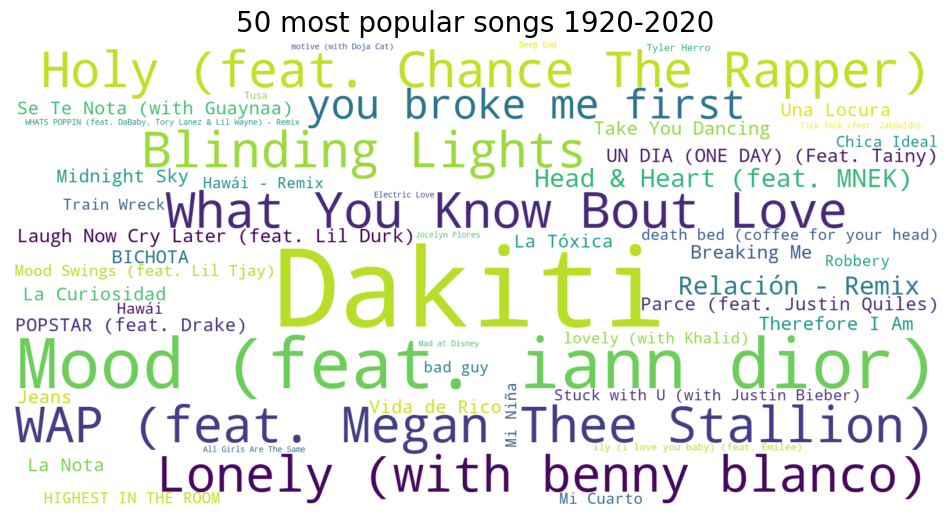

In [27]:
# plot a word cloud of the most popular songs over time
# create a dictionary of genre and their popularity
song_popularity = dat[['name', 'popularity']].set_index('name').to_dict()['popularity']
# sort the dictionary by value
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

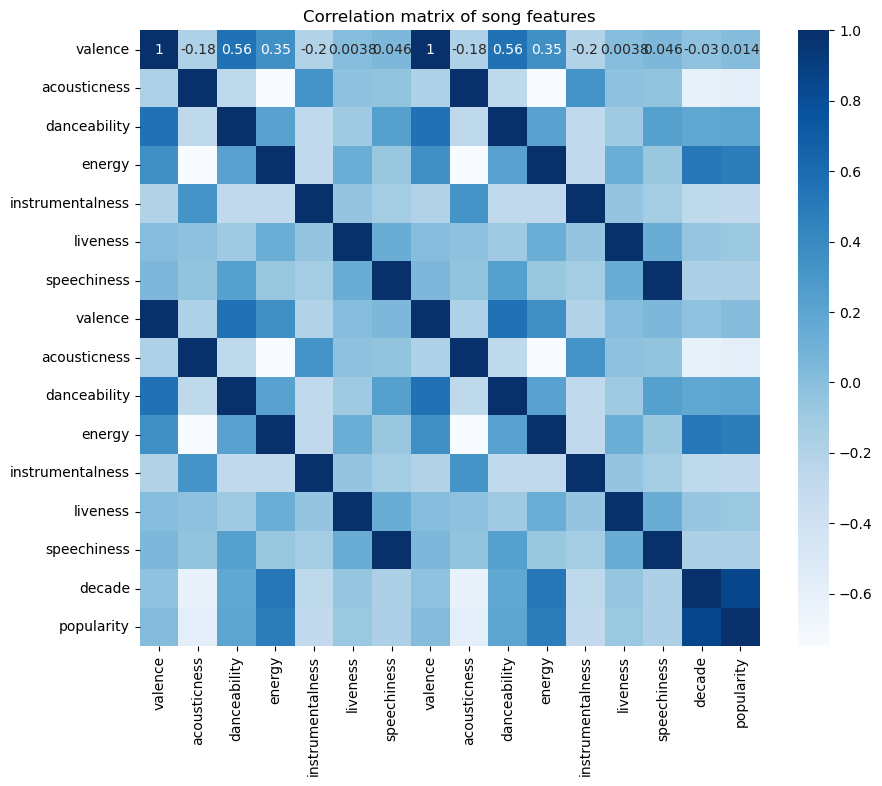

In [28]:
# make a correlation matrix of the song features, see what is more correlated with the popularity
all_features = song_features_normalized + song_features_normalized + ['decade', 'popularity']

# apply standardization to the features
scaler = StandardScaler()
feature_for_corr = scaler.fit_transform(dat[all_features])

# make a correlation matrix
corr = np.corrcoef(feature_for_corr.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, xticklabels=all_features, yticklabels=all_features, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

Note that popularity is stongly correlated with decade/year - that is because popularity is defined as how recent the streams of the song are.

In [29]:
# we can also check the most popular songs in each decade
# create a dictionary of artist and their popularity
song_popularity_decade = dat.groupby(['decade', 'name'])['popularity'].mean().reset_index()
song_popularity_decade = song_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
song_popularity_decade = song_popularity_decade.groupby('decade').head(1)
song_popularity_decade

,decade,name,popularity
136538,2010,Dakiti,100.0
122010,2000,"Hey, Soul Sister",83.0
106574,1990,Let It Snow! Let It Snow! Let It Snow! (with T...,80.0
84208,1980,Every Breath You Take,84.0
63057,1970,Back In Black,84.0
56323,1960,Rockin' Around The Christmas Tree,85.0
35943,1950,Johnny B. Goode,75.0
20035,1940,It's Beginning To Look Like Christmas,71.0
9606,1930,"It's Been a Long, Long Time",60.0
3460,1920,Monster Faladoré,55.0


# Build a recommender system

The goal of our recommender system is to recommend 10 songs to a user based on the songs he/she likes. We will use the `dat` dataset to build the recommender system. Because there is no user data but a lot of song features, we will use a content-based recommender system. For computing the similarity metric, we can use euclidean distance or cosine similarity. We will use cosine similarity here. For more metrics, see [here](https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681) for a nice review.

In [30]:
# build a recommendation system using the song features
# define the features to be used in the recommendation system

# features = song_features_normalized + song_features_not_normalized
features = song_features_normalized + song_features_not_normalized + ['decade', 'popularity']

# make a new dataframe, apply standardization to the features
scaler = StandardScaler()
feature_for_recommendation = scaler.fit_transform(dat[features])

# create a dataframe as a copy of the original dataframe and with the standardized features
dat_recommendation = dat.copy()
dat_recommendation[features] = feature_for_recommendation

# turn all song names into uppercase
dat_recommendation['name'] = dat_recommendation['name'].str.upper()

# save the dataframe
# dat_recommendation.to_csv('data/processes/dat_for_recommender.csv', index=False)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# define a function to get feature vector of a given song
def get_feature_vector(song_name, year):
# def get_feature_vector(song_name, artist):
    dat_song = dat_recommendation.query('name == @song_name & year == @year')
    # dat_song = dat_recommendation.query('name == @song_name & artists == @artist')
    song_repeated = 0
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset! \n Use search function first if you are not sure')
    if dat_song.shape[0] > 1:
        song_repeated = dat_song.shape[0]
        print(f'Warning: Multiple ({song_repeated}) songs with the same name and artist, the first one is selected!')
        dat_song = dat_song.head(1)
    feature_vector = dat_song[features].values
    return feature_vector, song_repeated

# define a function to get the most similar songs
def get_similar_songs(song_name, year, top_n=10, plot_type='wordcloud'):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    # calculate the cosine similarity
    similarities = cosine_similarity(dat_recommendation[features].values, feature_vector).flatten()
    # similarities = euclidean_distances(dat_recommendation[features].values, feature_vector).flatten()

    # get the index of the top_n similar songs not including itself
    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]
        
    # get the name, artist, and year of the most similar songs
    similar_songs = dat_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    
    if plot_type == 'wordcloud':
        # make a word cloud of the most similar songs and year, use the simalirity score as the size of the words
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # # create a mask for the word cloud
        # mask = np.array(Image.open("spotify-logo.png"))
        # create a word cloud
        wordcloud = WordCloud(width=1600, height=800, max_words=50, 
                            background_color='white', colormap='Set2').generate_from_frequencies(dict(song_similarity))
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        plt.tight_layout(pad=0)
        plt.show()
    
    elif plot_type == 'bar':
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        plt.figure(figsize=(12,10))
        plt.barh(range(len(song_similarity)), [val[1] for val in song_similarity], 
                 align='center', color=sns.color_palette('pastel', len(song_similarity)))
        plt.yticks(range(len(song_similarity)), [val[0] for val in song_similarity])
        plt.gca().invert_yaxis()
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        min_similarity = min(similarities[related_song_indices])
        max_similarity = max(similarities[related_song_indices])
        # add song name on the top of each bar
        for i, v in enumerate([val[0] for val in song_similarity]):
            plt.text(min_similarity*0.955, i, v, color='black', fontsize=12)
        # plt.xlabel('Similarity', fontsize=15)
        # plt.ylabel('Song', fontsize=15)
        plt.xlim(min_similarity*0.95, max_similarity)
        # not show figure frame and ticks
        plt.box(False)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)
        
        plt.show()
    # return similar_songs


# define a search function to search for a song and return its information
def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    print(f"Great! This song is in the dataset: {dat_song[['name', 'artists', 'release_date']].to_numpy()}")
    # return dat_song[['name', 'artists', 'year', 'release_date']]


In [41]:
# my_song = 'I TALK TO THE WIND'
#my_song = 'SMELLS LIKE TEEN SPIRIT'
#my_song = 'YOUR HAND IN MINE'
my_song = 'OLSEN OLSEN'
# my_song = '突然好想你'  # it even works for Chinese songs!

search_song(my_song)

Great! This song is in the dataset: [['OLSEN OLSEN' "['Sigur Rós']" '1999-06-12']]


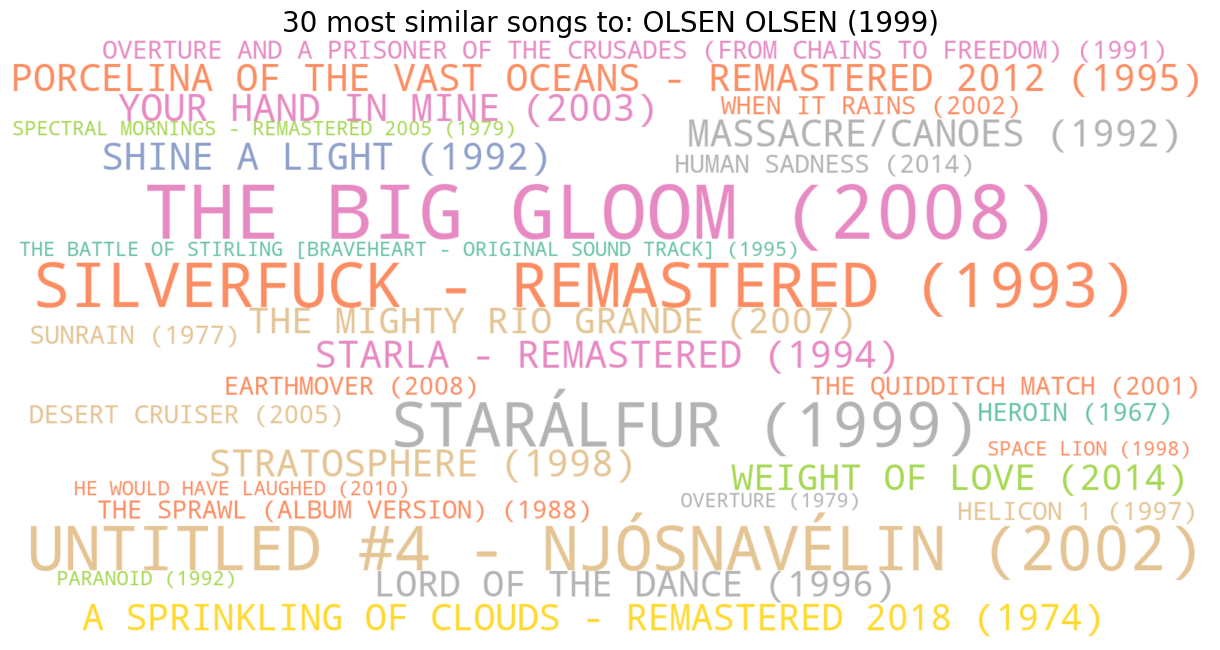

In [43]:
get_similar_songs(my_song, 1999, top_n=30, plot_type='wordcloud')

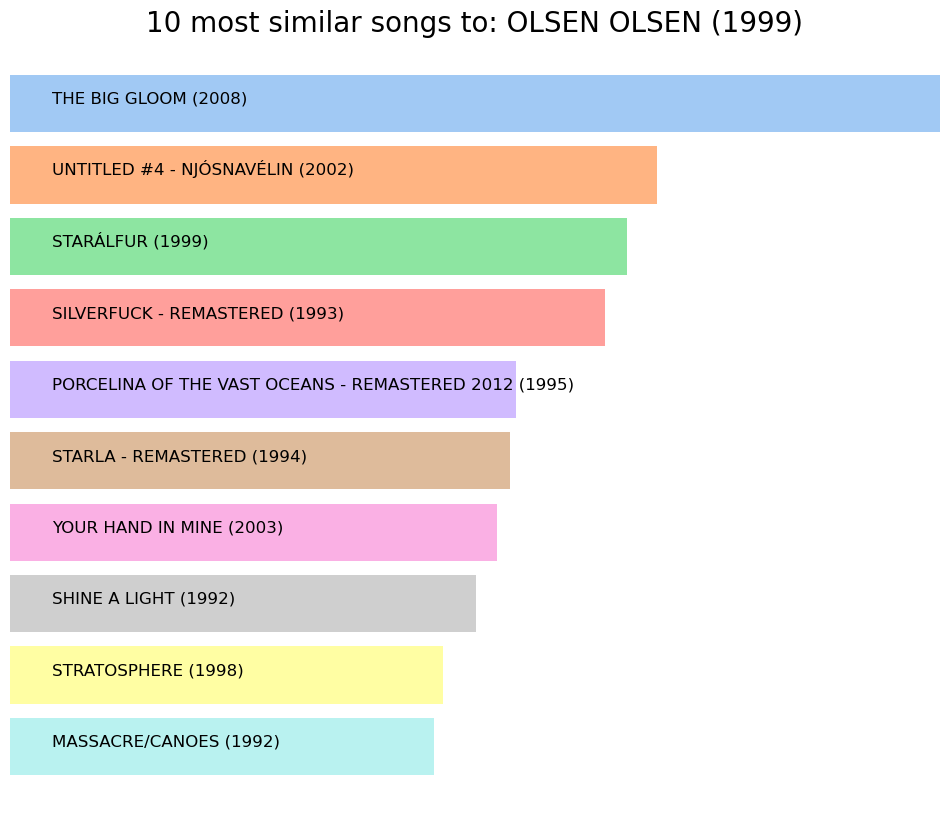

In [44]:
get_similar_songs(my_song, 1999, top_n=10, plot_type='bar')

# Conclusion

In this project, I analyzed the spotify songs by looking at the decade, artist, genre and popularity of the songs. Particularly, I applied dimensionality reduction methods to the genre data and found that the genres can be clustered into 4 groups. I also analyzed the popularity of the songs and found that popularity is strongly correlated with some features like the decade/year of the songs (which is due to Spotify's definition of popularity).

Then I built a recommender system using the song features and computed the cosine similarity between songs. The recommender system takes in a song and returns a list of songs that are similar to the input song. 

## Bonus: a web app

I further developed a demo app using streamlit in which you can customize the recommender system by selecting the features you focus on! 

The app can be found [here](https://yannansoda-spotify-music-recommender-app-16d88c.streamlit.app) with the app code in my [github repo](https://github.com/yannansoda/spotify-music-recommender/blob/main/app.py).

## Outlook
- The 'genre' feature is missing in the main dataset. Directly scrapping data using Spotify API is a possible solution.
- I only analyzed the correlation between features and popularity. It is possible to apply a regression model to predict the popularity of a song using the song features.
- It would be interesting to see how the recommender system performs on different genres. For example, does it perform better on pop songs or rock songs?
- The recommender system can be further improved by using more advanced methods such as neural networks.
